In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('household_power_consumption.txt',sep=';',low_memory=False)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [5]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [8]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [9]:
data.replace('?', np.nan, inplace=True)

In [10]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
DateTime                 0.000000
dtype: float64


In [11]:
data = data.fillna(method='ffill').fillna(method='bfill')


In [12]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent)

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
DateTime                 0.0
dtype: float64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [14]:
numeric_cols = ['Global_active_power', 'Global_reactive_power', 
                'Voltage', 'Global_intensity', 
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data[numeric_cols] = data[numeric_cols].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [16]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
dtype: int64

In [17]:
data.shape

(2075259, 8)

In [18]:
data.set_index('DateTime', inplace=True)

In [19]:
hourly_data = data.resample('H').mean()
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [20]:
print(data.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


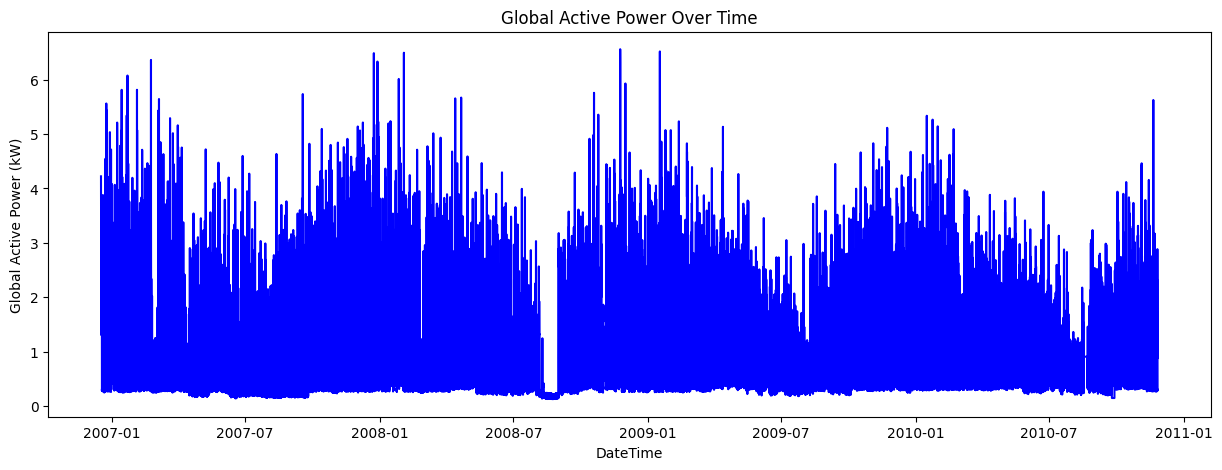

In [21]:
plt.figure(figsize=(15,5))
plt.plot(hourly_data['Global_active_power'], color='blue')
plt.title("Global Active Power Over Time")
plt.xlabel("DateTime")
plt.ylabel("Global Active Power (kW)")
plt.show()

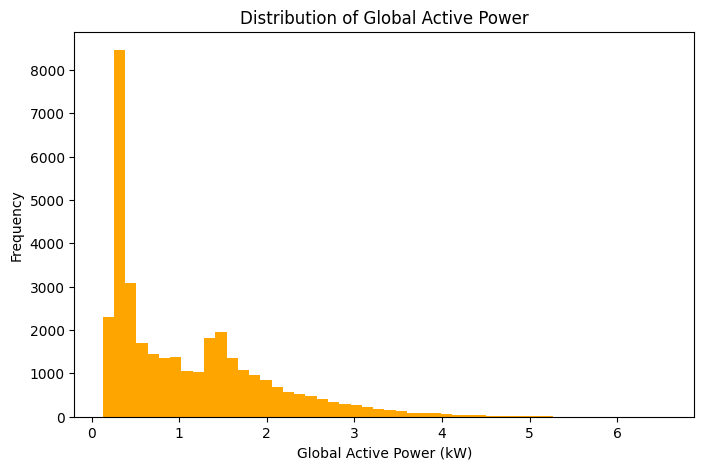

In [22]:
plt.figure(figsize=(8,5))
plt.hist(hourly_data['Global_active_power'], bins=50, color='orange')
plt.title("Distribution of Global Active Power")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequency")
plt.show()

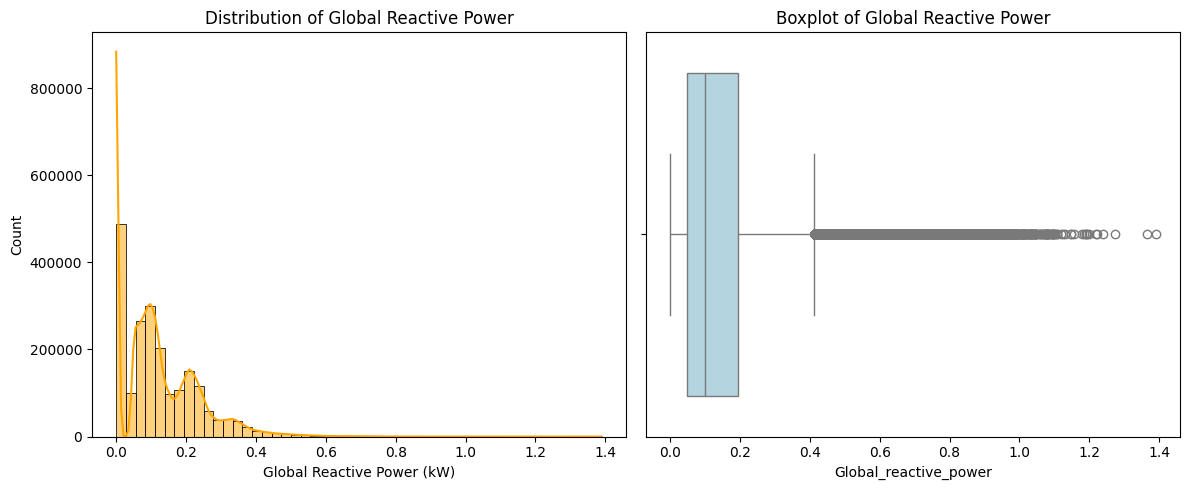

In [23]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data['Global_reactive_power'], bins=50, color='orange', kde=True)
plt.title('Distribution of Global Reactive Power')
plt.xlabel('Global Reactive Power (kW)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=data['Global_reactive_power'], color='lightblue')
plt.title('Boxplot of Global Reactive Power')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['Voltage'], bins=50, color='green', kde=True)
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (V)')

plt.subplot(1,2,2)
sns.boxplot(x=data['Voltage'], color='lightcoral')
plt.title('Boxplot of Voltage')

plt.tight_layout()
plt.show()


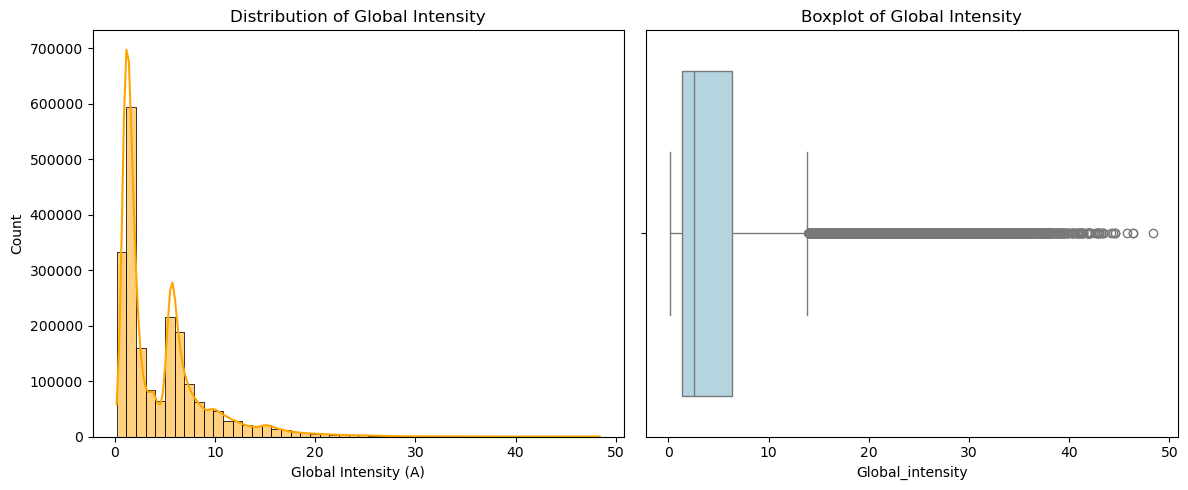

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['Global_intensity'], bins=50, color='orange', kde=True)
plt.title('Distribution of Global Intensity')
plt.xlabel('Global Intensity (A)')

plt.subplot(1,2,2)
sns.boxplot(x=data['Global_intensity'], color='lightblue')
plt.title('Boxplot of Global Intensity')

plt.tight_layout()
plt.show()


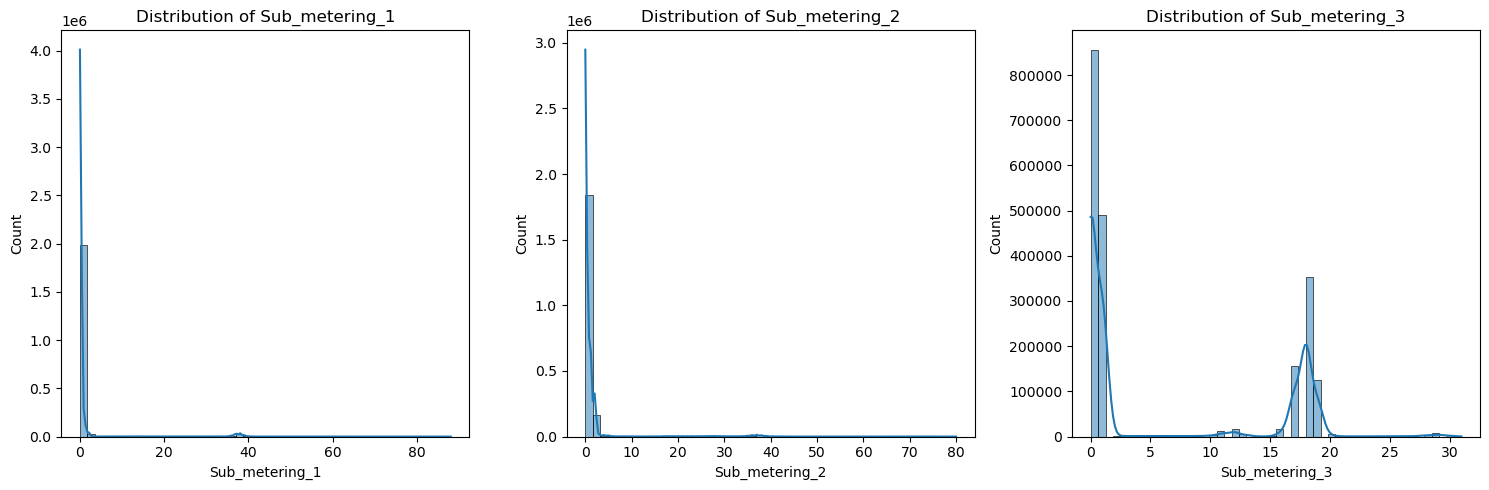

In [ ]:
sub_meter_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

plt.figure(figsize=(15,5))
for i, col in enumerate(sub_meter_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


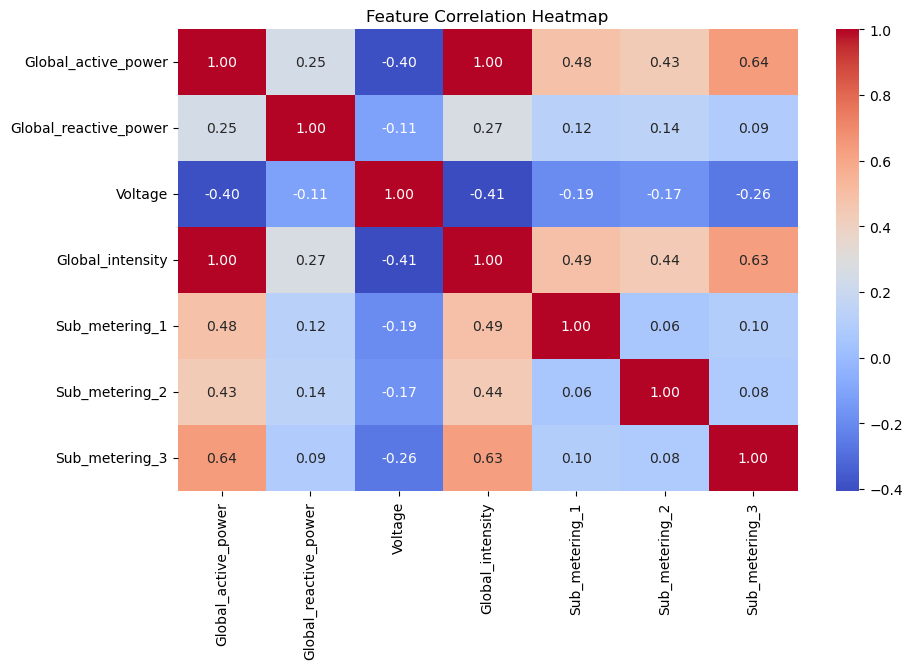

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
data = data.interpolate(method='time')


In [ ]:
data = data.drop(['Sub_metering_1', 'Sub_metering_2','Global_intensity'],axis = 1)

In [ ]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3
DateTime,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,17.0


In [ ]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [ ]:
data['Global_active_power'] = np.log1p(data['Global_active_power'])
data['Global_reactive_power'] = np.log1p(data['Global_reactive_power'])


In [ ]:
hourly_data = data.resample('H').mean()


In [ ]:
data['hour'] = data.index.hour
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek  # Monday=0, Sunday=6
data['month'] = data.index.month
data['year'] = data.index.year
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['part_of_day'] = data['hour'].apply(get_part_of_day)

In [ ]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3,hour,day,day_of_week,month,year,is_weekend,part_of_day
DateTime,,,,,,,,,,,
2010-11-26 20:58:00,0.665776,0.0,240.43,0.0,20,26,4,11,2010,0,Evening
2010-11-26 20:59:00,0.664748,0.0,240.00,0.0,20,26,4,11,2010,0,Evening
2010-11-26 21:00:00,0.661657,0.0,239.82,0.0,21,26,4,11,2010,0,Night
2010-11-26 21:01:00,0.659590,0.0,239.70,0.0,21,26,4,11,2010,0,Night
2010-11-26 21:02:00,0.658556,0.0,239.55,0.0,21,26,4,11,2010,0,Night


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('Global_active_power',axis=1)
y = data['Global_active_power']

In [ ]:
X

,Global_reactive_power,Voltage,Sub_metering_3,hour,day,day_of_week,month,year,is_weekend,part_of_day
DateTime,,,,,,,,,,
2006-12-16 17:24:00,0.349247,234.84,17.0,17,16,5,12,2006,1,Evening
2006-12-16 17:25:00,0.361861,233.63,16.0,17,16,5,12,2006,1,Evening
2006-12-16 17:26:00,0.404131,233.29,17.0,17,16,5,12,2006,1,Evening
2006-12-16 17:27:00,0.406798,233.74,17.0,17,16,5,12,2006,1,Evening
2006-12-16 17:28:00,0.423960,235.68,17.0,17,16,5,12,2006,1,Evening
...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.000000,240.43,0.0,20,26,4,11,2010,0,Evening
2010-11-26 20:59:00,0.000000,240.00,0.0,20,26,4,11,2010,0,Evening
2010-11-26 21:00:00,0.000000,239.82,0.0,21,26,4,11,2010,0,Night


In [ ]:
X = pd.get_dummies(X, columns=['part_of_day'], drop_first=True).astype(int)


In [ ]:
X.tail()

,Global_reactive_power,Voltage,Sub_metering_3,hour,day,day_of_week,month,year,is_weekend,part_of_day_Evening,part_of_day_Morning,part_of_day_Night
DateTime,,,,,,,,,,,,
2010-11-26 20:58:00,0,240,0,20,26,4,11,2010,0,1,0,0
2010-11-26 20:59:00,0,240,0,20,26,4,11,2010,0,1,0,0
2010-11-26 21:00:00,0,239,0,21,26,4,11,2010,0,0,0,1
2010-11-26 21:01:00,0,239,0,21,26,4,11,2010,0,0,0,1
2010-11-26 21:02:00,0,239,0,21,26,4,11,2010,0,0,0,1


In [ ]:
X.columns

Index(['Global_reactive_power', 'Voltage', 'Sub_metering_3', 'hour', 'day',
       'day_of_week', 'month', 'year', 'is_weekend', 'part_of_day_Evening',
       'part_of_day_Morning', 'part_of_day_Night'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =  scaler.fit_transform(X)

In [ ]:
X

array([[ 0.        , -1.95446459,  1.25701354, ...,  2.23537196,
        -0.64164115, -0.70705312],
       [ 0.        , -2.2623362 ,  1.13824169, ...,  2.23537196,
        -0.64164115, -0.70705312],
       [ 0.        , -2.2623362 ,  1.25701354, ...,  2.23537196,
        -0.64164115, -0.70705312],
       ...,
       [ 0.        , -0.41510659, -0.76210791, ..., -0.44735284,
        -0.64164115,  1.4143209 ],
       [ 0.        , -0.41510659, -0.76210791, ..., -0.44735284,
        -0.64164115,  1.4143209 ],
       [ 0.        , -0.41510659, -0.76210791, ..., -0.44735284,
        -0.64164115,  1.4143209 ]])

In [ ]:
y

DateTime
2006-12-16 17:24:00    1.651731
2006-12-16 17:25:00    1.850028
2006-12-16 17:26:00    1.852227
2006-12-16 17:27:00    1.854421
2006-12-16 17:28:00    1.540302
                         ...   
2010-11-26 20:58:00    0.665776
2010-11-26 20:59:00    0.664748
2010-11-26 21:00:00    0.661657
2010-11-26 21:01:00    0.659590
2010-11-26 21:02:00    0.658556
Name: Global_active_power, Length: 2075259, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(1660207, 12) (415052, 12)


In [ ]:
data.shape

(2075259, 11)

In [ ]:
hourly_data.shape

(34589, 4)

In [ ]:
df = hourly_data.copy().dropna()


In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3
DateTime,,,,
2006-12-16 17:00:00,1.631180,0.189663,234.643889,16.861111
2006-12-16 18:00:00,1.503537,0.075048,234.580167,16.866667
2006-12-16 19:00:00,1.481210,0.080171,233.232500,16.683333
2006-12-16 20:00:00,1.448946,0.071232,234.071500,16.783333
2006-12-16 21:00:00,1.388675,0.072408,237.158667,17.216667
...,...,...,...,...
2010-11-26 17:00:00,0.982326,0.057679,237.069667,12.866667
2010-11-26 18:00:00,0.939403,0.050806,237.531833,0.000000
2010-11-26 19:00:00,0.966614,0.057062,236.741000,0.000000


In [ ]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)


In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3,hour,day_of_week,month,is_weekend
DateTime,,,,,,,,
2006-12-16 17:00:00,1.631180,0.189663,234.643889,16.861111,17,5,12,1
2006-12-16 18:00:00,1.503537,0.075048,234.580167,16.866667,18,5,12,1
2006-12-16 19:00:00,1.481210,0.080171,233.232500,16.683333,19,5,12,1
2006-12-16 20:00:00,1.448946,0.071232,234.071500,16.783333,20,5,12,1
2006-12-16 21:00:00,1.388675,0.072408,237.158667,17.216667,21,5,12,1
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,0.982326,0.057679,237.069667,12.866667,17,4,11,0
2010-11-26 18:00:00,0.939403,0.050806,237.531833,0.000000,18,4,11,0
2010-11-26 19:00:00,0.966614,0.057062,236.741000,0.000000,19,4,11,0


In [ ]:
target = 'Global_active_power'
X = df.drop(columns=[target])
y = df[target]


In [ ]:
split_idx = int(len(df) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=120,
    max_depth=18,
    min_samples_leaf=20,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RF MAE: {mae:.4f}")
print(f"RF RMSE: {rmse:.4f}")
print(f"RF R²: {r2:.4f}")


RF MAE: 0.1087
RF RMSE: 0.1538
RF R²: 0.7803
